# 2_Transform_data

### Import libraries

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Import user defined libraries
import sys
sys.path.append("../src")
from functions import PhaNNS_thresholds, phageRBP_thresholds, NN_thresholds, random_concatenation

## 1. Load clean data

In [297]:
CLEAN_PATH = os.path.join('..', 'data', 'interim', 'clean')

if not os.path.exists(CLEAN_PATH):
    raise Exception('Clean data path does not exist. Did you run the notebook 01_clean_data.ipynb?')

# Import pickle clean data
receptors = pd.read_pickle(os.path.join(CLEAN_PATH, '1_receptors.pkl'))
protein_NN = pd.read_pickle(os.path.join(CLEAN_PATH, '1_proteins.pkl'))
basel_proteome = pd.read_pickle(os.path.join(CLEAN_PATH, '1_basel_proteome.pkl'))
k12_proteome = pd.read_pickle(os.path.join(CLEAN_PATH, '1_k12_proteome.pkl'))


In [298]:
# Display all dataframes
print('Receptors:')
display(receptors.head())
print('Protein NN:')
display(protein_NN.head())
print('Basel proteome:')
display(basel_proteome.head())
print('K12 proteome:')
display(k12_proteome.head())

Receptors:


,bas,genus,phage,morphotype,closest_relative,primary_receptor,terminal_receptor,receptor
0,Bas01,Rtpvirus,Escherichia phage AugustePiccard,siphovirus,RTP (AM156909.1),LPS / O-antigen?,LptD,n.a.
1,Bas02,Guelphvirus,Escherichia phage JeanPiccard,siphovirus,CEB_EC3a (NC_047812.1),LPS / O-antigen?,LptD,n.a.
2,Bas03,Guelphvirus,Escherichia phage JulesPiccard,siphovirus,CEB_EC3a (NC_047812.1),LPS / O-antigen?,FhuA,n.a.
3,Bas04,Warwickvirus,Escherichia phage FritzSarasin,siphovirus,tonnikala (NC_049817.1),LPS / O-antigen?,BtuB,n.a.
4,Bas05,Warwickvirus,Escherichia phage PeterMerian,siphovirus,XY3 (MN781674.1),LPS / O-antigen?,FhuA,n.a.


Protein NN:


,seqID,major_capsid,minor_capsid,baseplate,major_tail,minor_tail,portal,tail_fiber,tail_shaft,collar,HTJ,other,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_label,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.22,0.84,0.18,0.21,0.34,0.85,0.49,0.24,0.46,0.38,5.79,0.98,0,2.403247e-05,other,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,1.00,0,3.570606e-08,other,0
2,lcl|MZ501051.1_prot_QXV76134.1_3,0.35,1.01,0.71,0.26,1.30,0.97,0.68,0.25,0.24,0.73,3.51,0.97,0,1.817806e-06,other,0
3,lcl|MZ501051.1_prot_QXV76135.1_4,0.01,0.23,0.02,0.01,0.03,0.10,0.09,0.01,0.16,0.03,9.32,1.00,0,1.184212e-05,other,0
4,lcl|MZ501051.1_prot_QXV76136.1_5,0.05,0.07,0.06,0.05,0.13,0.09,0.03,0.07,0.08,0.07,9.28,1.00,0,8.151848e-05,other,0


Basel proteome:


,seqID_phage,locus_tag,protein,protein_id,location,gbkey,sequence,gene,db_xref,frame,partial,exception,bas
0,lcl|MZ501051.1_prot_QXV76132.1_1,bas01_0001,terminase small subunit,QXV76132.1,1..507,CDS,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...,NaN,NaN,NaN,NaN,NaN,Bas01
1,lcl|MZ501051.1_prot_QXV76133.1_2,bas01_0002,hypothetical protein,QXV76133.1,526..621,CDS,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI,NaN,NaN,NaN,NaN,NaN,Bas01
2,lcl|MZ501051.1_prot_QXV76134.1_3,bas01_0003,terminase large subunit,QXV76134.1,609..2177,CDS,MANLIWEEMTSQEKLAVKAISEHSFEGFLRCWFSITQGERYIPNWH...,NaN,NaN,NaN,NaN,NaN,Bas01
3,lcl|MZ501051.1_prot_QXV76135.1_4,bas01_0004,putative homing endonuclease,QXV76135.1,2321..2716,CDS,MVAGSLSGNGYLHIRIGDRRVKNHLIIWEMHNGRIPEGMEIDHINH...,NaN,NaN,NaN,NaN,NaN,Bas01
4,lcl|MZ501051.1_prot_QXV76136.1_5,bas01_0005,hypothetical protein,QXV76136.1,2788..3168,CDS,MTKKSKAVYLGNTEGEYYGFTVGNEYDVHNYETEDNFIGTFGDDGG...,NaN,NaN,NaN,NaN,NaN,Bas01


K12 proteome:


,seqID_k12,name,OS,OX,GN,PE,SV,sequence
0,sp|A5A616|MGTS_ECOLI,Small protein MgtS,Escherichia coli (strain K12),83333,mgtS,1,1,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD
1,sp|O32583|THIS_ECOLI,Sulfur carrier protein ThiS,Escherichia coli (strain K12),83333,thiS,1,1,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...
2,sp|P00350|6PGD_ECOLI,"6-phosphogluconate dehydrogenase, decarboxylat...",Escherichia coli (strain K12),83333,gnd,1,2,MSKQQIGVVGMAVMGRNLALNIESRGYTVSIFNRSREKTEEVIAEN...
3,sp|P00363|FRDA_ECOLI,Fumarate reductase flavoprotein subunit,Escherichia coli (strain K12),83333,frdA,1,3,MQTFQADLAIVGAGGAGLRAAIAAAQANPNAKIALISKVYPMRSHT...
4,sp|P00370|DHE4_ECOLI,NADP-specific glutamate dehydrogenase,Escherichia coli (strain K12),83333,gdhA,1,1,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...


## 2. Keep only important columns and rename

### 2.1 Protein receptors
Some of basel receptors are terminal (aka secondary) and some are primary. In both columns there are both LPS and proteins. We only care about proteins, so it might be a good idea to add a column 'receptor_protein' which selects the proteic one from the two. Also, the 'receptor' column has no proteins, so it is useless for further analysis. \
We will keep only the values which find a match in the k12 gene set.\
NB: some values have a question mark. Since we are aiming fro an as-strict-as-possible labelling, these values are not included

In [299]:
# Get a set of the elements in a df
GN_set = set(k12_proteome['GN'].str.lower().tolist())

# Strip values in primary_receptor and terminal_receptor of '?'
receptors['primary_receptor'] = receptors['primary_receptor'].str.strip('?')
receptors['terminal_receptor'] = receptors['terminal_receptor'].str.strip('?')

# Create a subset that contains only the rows where either primary_receptor or terminal_receptor are in GN_set
receptors = receptors[(receptors['primary_receptor'].str.lower().isin(GN_set)) | (receptors['terminal_receptor'].str.lower().isin(GN_set))]
receptors['receptor_protein'] = np.where(receptors['primary_receptor'].str.lower().isin(GN_set), receptors['primary_receptor'], 
                                      np.where(receptors['terminal_receptor'].str.lower().isin(GN_set), receptors['terminal_receptor'], np.nan))

# keep only useful columns
keep_columns = ['bas', 'phage', 'receptor_protein']
receptors = receptors[keep_columns]

In [300]:
display(receptors)
display(receptors.shape)

,bas,phage,receptor_protein
0,Bas01,Escherichia phage AugustePiccard,LptD
1,Bas02,Escherichia phage JeanPiccard,LptD
2,Bas03,Escherichia phage JulesPiccard,FhuA
3,Bas04,Escherichia phage FritzSarasin,BtuB
4,Bas05,Escherichia phage PeterMerian,FhuA
5,Bas06,Escherichia phage KarlJaspers,BtuB
6,Bas07,Escherichia phage JakobBernoulli,FhuA
7,Bas08,Escherichia phage DanielBernoulli,TolC
8,Bas09,Escherichia phage PaulSarasin,FhuA
11,Bas12,Escherichia phage BrunoManser,FhuA


(52, 3)

In [301]:
# Compare sets of receptors['receptor_protein'] and GN_set
receptors_set = set(receptors['receptor_protein'].str.lower().tolist())
print('Number of receptors in receptors_set:', len(receptors_set))
print('Number of receptors in GN_set:', len(GN_set))
print('Number of receptors in both sets:', len(receptors_set.intersection(GN_set)))
print('receptors in receptors_set but not in GN_set:', receptors_set.difference(GN_set))

Number of receptors in receptors_set: 11
Number of receptors in GN_set: 4403
Number of receptors in both sets: 11
receptors in receptors_set but not in GN_set: set()


The number of samples was reduced from 78 to 52

### 2.2 Protein NN
Of the PhaNN classification we will only care about tail_fiber and the confidence score. The rest can be dropped. \
Also, we care only about the binary classification of the ESM-based model

In [302]:
# Rename seqID to seqID_phage
protein_NN = protein_NN.rename(columns={'seqID': 'seqID_phage'})

# Keep only useful columns
keep_columns = ['seqID_phage', 'tail_fiber', 'confidence', 'PhageRBPdetect_prediction', 'PhageRBPdetect_score', 'ESM_based_fiber_prediction']
protein_NN = protein_NN[keep_columns]

In [303]:
display(protein_NN.head(2))
display(protein_NN.shape)

,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.49,0.98,0,2.403247e-05,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,1.00,0,3.570606e-08,0


(35416, 6)

### 2.3 Basel proteome

In [304]:
# Rename sequence to sequence_phage
basel_proteome = basel_proteome.rename(columns={'sequence': 'sequence_phage'})

# Keep only useful columns
keep_columns = ['bas', 'seqID_phage', 'protein', 'sequence_phage']
basel_proteome = basel_proteome[keep_columns]

In [305]:
display(basel_proteome.head(2))
display(basel_proteome.shape)

,bas,seqID_phage,protein,sequence_phage
0,Bas01,lcl|MZ501051.1_prot_QXV76132.1_1,terminase small subunit,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...
1,Bas01,lcl|MZ501051.1_prot_QXV76133.1_2,hypothetical protein,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI


(35416, 4)

In [306]:
# Save unique bas in txt file
basel_proteome['bas'].unique().tolist()
# Convert all to string
basel_proteome['bas'] = basel_proteome['bas'].astype(str).sort_values()

with open(os.path.join(CLEAN_PATH, '2_basel_proteome_bas.txt'), 'w') as f:
    for item in basel_proteome['bas'].unique().tolist():
        f.write("%s\n" % item)

### 2.4 k12 proteome

In [307]:
# List columns to keep and columns to rename
keep_columns = ['seqID_k12', 'sequence', 'GN']
change_names = {'sequence': 'sequence_k12',
                'GN': 'GN_k12'}

# Subset receptors_k12 and rename columns
k12_proteome = k12_proteome[keep_columns]
k12_proteome.rename(columns=change_names, inplace=True)

del keep_columns, change_names

In [308]:
display(k12_proteome.head(2))
display(k12_proteome.shape)

,seqID_k12,sequence_k12,GN_k12
0,sp|A5A616|MGTS_ECOLI,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD,mgtS
1,sp|O32583|THIS_ECOLI,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...,thiS


(4403, 3)

## 3. Merge receptors and k12_proteome

### 3.1 k12 genes unicity

First of all, let's check for the unicity of the gene names in k12 proteome

In [309]:
# Count occurences in k12_proteome of each GN
GN_count = k12_proteome['GN_k12'].str.lower().value_counts().to_frame()

# Print count of genes with a count of 1 and different than 1
print(f'Number of genes with a count of 1: {len(GN_count.loc[GN_count["count"] == 1])}')
print(f'Number of genes with a count different than 1: {len(GN_count.loc[GN_count["count"] != 1])}')

Number of genes with a count of 1: 4403
Number of genes with a count different than 1: 0


We can confirm that there are no duplicates among the k12 genes

### 3.2 Match receptor and sequence
Let's match each phage in the receptors dataframe with the sequence of the associated receptor, contained in k12_proteome.\
We expect that many entries from receptors could match to the same gene in k12_proteome, and not viceversa. \
We validate this using validate='many_to_one' during the merge, which would raise an error otherwise.

In [310]:
# Add a lower case column of receptor_protein as common identifier between receptors and k12_proteome
receptors['receptor_protein_lower'] = receptors['receptor_protein'].str.lower()
k12_proteome['GN_lower'] = k12_proteome['GN_k12'].str.lower()

# Merge datasets
receptors_k12 = receptors.merge(k12_proteome, how='inner', left_on='receptor_protein_lower', right_on='GN_lower', suffixes=('_phage', '_k12'), validate='many_to_one')

# Drop GN_lower and receptor_protein_lower and order by bas
receptors_k12.drop(columns=['GN_lower', 'receptor_protein_lower'], inplace=True)
receptors_k12.sort_values(by=['bas'], inplace=True)

# Drop GN_k12 and GN_lower in k12_proteome
k12_proteome.drop(columns=['GN_k12', 'GN_lower'], inplace=True)

In [311]:
display(receptors_k12.head())
display(receptors_k12.shape)

,bas,phage,receptor_protein,seqID_k12,sequence_k12,GN_k12
0,Bas01,Escherichia phage AugustePiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
1,Bas02,Escherichia phage JeanPiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
7,Bas03,Escherichia phage JulesPiccard,FhuA,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,fhuA
17,Bas04,Escherichia phage FritzSarasin,BtuB,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,btuB
8,Bas05,Escherichia phage PeterMerian,FhuA,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,fhuA


(52, 6)

Let's store a dict of the k12 proteins which are receptors involved in any interaction with the phages and the other way around

In [312]:
# Store seqID_k12 unique values k12_set['receptors'] the seqID_k12 of k12_proteome which are not in receptors_k12 in k12_set['others']
k12_set = {'receptors': set(receptors_k12['seqID_k12'].tolist()),
           'others': set(k12_proteome['seqID_k12'].tolist()) - set(receptors_k12['seqID_k12'].tolist())}

In [313]:
# Print the number of elements in each set
print('Number of receptors: {}'.format(len(k12_set['receptors'])))
print('Number of others: {}'.format(len(k12_set['others'])))

Number of receptors: 11
Number of others: 4392


## 4. Get RBPs
Let's define a regex to get RBPs from the 'protein' tag of basel proteome, as well a regex to exclude the ones which are not RBPs. \

In [315]:
# Define gene column in basel_proteome from the seqID_phage
# Where the seqID_phage has lcl|MZ501051.1_prot_QXV76132.1_1, the gene is MZ501051
basel_proteome['gene'] = basel_proteome['seqID_phage'].str.split('.').str[0].str.split('|').str[1]

In [316]:
import re
INCLUDE_REGEX = 'tail?(.?|\s*)(?:spike?|fib(?:er|re))|recept(?:o|e)r(.?|\s*)(?:bind|recogn).*(?:protein)?|(?<!\w)RBP(?!a)'
# Create exclusion list from the file in data/raw as a set. The file is in format gene1|gene2|gene3|...
# Reference:
# https://github.com/RyanCook94/inphared/blob/main/exclusion_list.txt
with open(os.path.join('..', 'data', 'raw', 'exclusion_list.txt'), 'r') as f: 
    GENE_EXCLUSION_LIST = set(f.read().split('|'))

PROTEIN_EXCLUSION_LIST = ['putative', 'chaperone', 'assembly', 'RNA', 'connector', 'baseplate']

In [317]:
# Filter basel_proteeme to keep only the rows where protein matches the regex
tail_fibers = basel_proteome.dropna(subset=['protein'])
tail_fibers = tail_fibers[tail_fibers['protein'].str.contains(INCLUDE_REGEX, flags=re.IGNORECASE, regex=True)]
print(f'Number of rows in tail_fibers: {len(tail_fibers)}')

# Remove rows where gene matches the exclusion list
tail_fibers = tail_fibers[~tail_fibers['gene'].isin(GENE_EXCLUSION_LIST)]
print(f'Number of rows in tail_fibers after removing exclusion list: {len(tail_fibers)}')

# Remove rows where protein matches the exclusion list
# Defined by me after looging at the protein names after the previous two filters
tail_fibers = tail_fibers[~tail_fibers['protein'].str.contains('|'.join(PROTEIN_EXCLUSION_LIST), flags=re.IGNORECASE, regex=True)]
print(f'Number of rows in tail_fibers after removing protein exclusion list: {len(tail_fibers)}')

# Show unique values in protein
print('Unique values in protein:')
display(tail_fibers['protein'].unique())

Number of rows in tail_fibers: 852
Number of rows in tail_fibers after removing exclusion list: 852
Number of rows in tail_fibers after removing protein exclusion list: 570
Unique values in protein:


C:\Users\pf259\AppData\Local\Temp\ipykernel_19972\51472723.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tail_fibers = tail_fibers[tail_fibers['protein'].str.contains(INCLUDE_REGEX, flags=re.IGNORECASE, regex=True)]


array(['lateral tail fiber protein', 'tail fiber protein',
       'tail fibers protein', 'major tail fibers protein',
       'long tail fiber protein', 'phage tail fiber protein',
       'tail fiber', 'central tail fiber J', 'side tail fiber protein',
       'side tail fiber', 'receptor-binding tail tip protein',
       'collar tail protein for L-shaped tail fibre attachment',
       'receptor binding tail protein', 'receptor-binding tail protein',
       'receptor binding protein', 'receptor-binding protein',
       'L-shaped tail fiber', 'L-shaped tail fiber protein',
       'long tail fiber proximal subunit',
       'long tail fiber distal subunit',
       'adhesin tip for distal long tail fiber', 'short tail fiber',
       'long tail fiber distal subunit with adhesin domain',
       'chaperonin for distal long tail fiber', 'short tail fibers',
       'receptor recognition protein',
       'phage long tail fiber proximal subunit', 'tail fiber protein p35',
       'tail fiber protein

,count
bas,
10164rh,1
3a,2
Acg-c40,3
Apcec01,2
Apcec02,1
...,...
T7p52,1
Ukendt,2
Vbecos95,2


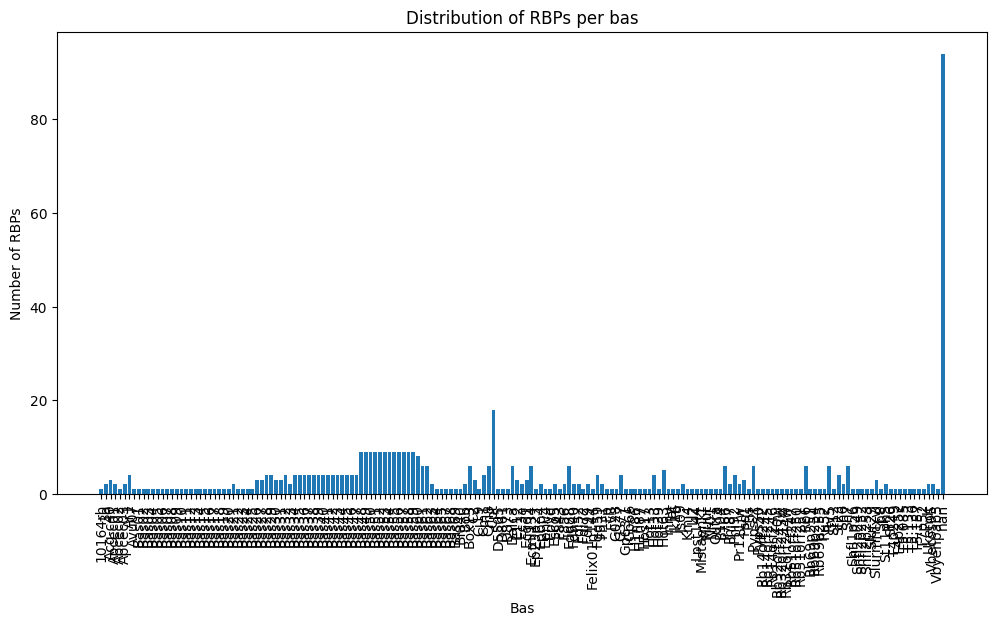

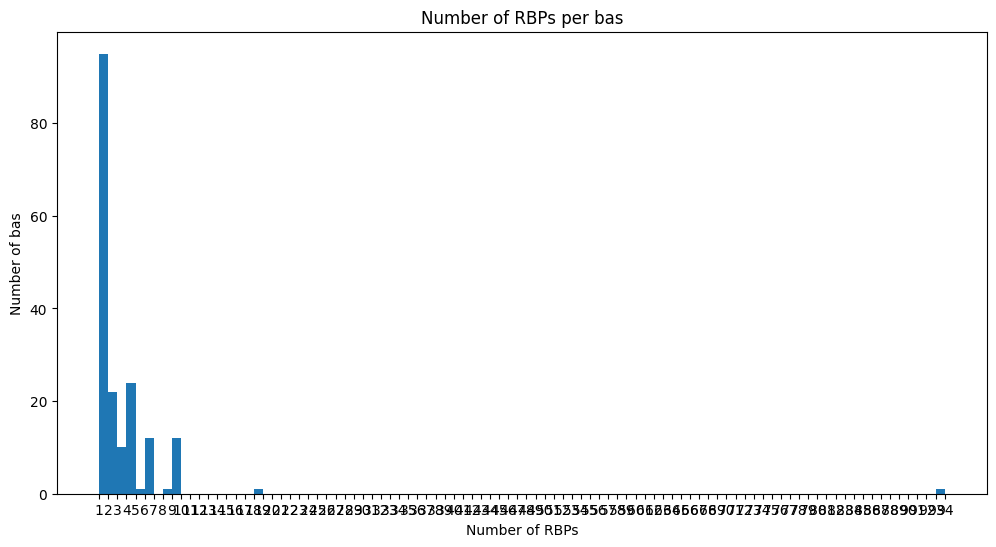

In [318]:
# Count occurences in RBPs for each bas
RBPs_count = tail_fibers['bas'].value_counts().to_frame()
# Display in descending order
RBPs_count.sort_values(by=['bas'], ascending=True, inplace=True)

# # Save as xlsx
# RBPs_count.to_excel(os.path.join(CLEAN_PATH, '2_RBPs_count.xlsx'), index=True)
# display(RBPs_count)

# Plot the distribution of RBPs per bas
plt.figure(figsize=(12, 6))
plt.bar(RBPs_count.index, RBPs_count['count'])
plt.xticks(rotation=90)
plt.xlabel('Bas')
plt.ylabel('Number of RBPs')
plt.title('Distribution of RBPs per bas')
plt.show()

# Plot how many bas for each count
plt.figure(figsize=(12, 6))
bins = range(1, max(RBPs_count['count']) + 1)
plt.hist(RBPs_count['count'], bins=bins, align='mid')
plt.xlabel('Number of RBPs')
plt.ylabel('Number of bas')
plt.title('Number of RBPs per bas')

# Set xticks to be the center of each bin
plt.xticks([i for i in bins], bins)

plt.show()



Let's store the list of the proteins labeled as tail_fibers

In [319]:
# Store tail_fibers unique values of seqID in phage_set['RBP'] and the seqID of basel proteome which are not in tail_fibers in phage_set['others']
phage_set = {'tail_fibers': set(tail_fibers['seqID_phage'].tolist()),
             'others': set(basel_proteome['seqID_phage'].tolist()) - set(tail_fibers['seqID_phage'].tolist())}
             
# Print the number of elements in each set
print('Number of tail fibers: {}'.format(len(phage_set['tail_fibers'])))
print('Number of others: {}'.format(len(phage_set['others'])))

Number of tail fibers: 570
Number of others: 34846


## 5. Obtain protein pairs
Let's now obtain a the set of interacting protein pairs. \
We will then need to obtain a set of negative samples. The model input set will consist of this two sets together.



In [320]:
# Display first 2 rows of all dataframes (with title)
print('Receptors k12:')
display(receptors_k12.head(2))
print('Protein NN:')
display(protein_NN.head(2))
print('Basel proteome:')
display(basel_proteome.head(2))
print('K12 proteome:')
display(k12_proteome.head(2))
print('Tail fibers:')
display(tail_fibers.head(2))

Receptors k12:


,bas,phage,receptor_protein,seqID_k12,sequence_k12,GN_k12
0,Bas01,Escherichia phage AugustePiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
1,Bas02,Escherichia phage JeanPiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD


Protein NN:


,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.49,0.98,0,2.403247e-05,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,1.00,0,3.570606e-08,0


Basel proteome:


,bas,seqID_phage,protein,sequence_phage,gene
0,Bas01,lcl|MZ501051.1_prot_QXV76132.1_1,terminase small subunit,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...,MZ501051
1,Bas01,lcl|MZ501051.1_prot_QXV76133.1_2,hypothetical protein,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI,MZ501051


K12 proteome:


,seqID_k12,sequence_k12
0,sp|A5A616|MGTS_ECOLI,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD
1,sp|O32583|THIS_ECOLI,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...


Tail fibers:


,bas,seqID_phage,protein,sequence_phage,gene
37,Bas01,lcl|MZ501051.1_prot_QXV76169.1_38,lateral tail fiber protein,MAIYDLGTASLSANGEVTGVGTTWKAPLTLIRVGATIVFKTEPVKI...,MZ501051
111,Bas02,lcl|MZ501080.1_prot_QXV80800.1_34,lateral tail fiber protein,MAIYDLGTASLAANGEVTGVGTTWKAPLTLIRVGATIIFKTNPIKI...,MZ501080


Merge a subset of basel proteome composed of tail fibers with receptors_k12. \
We are keeping only the entries where we have the values from both datasets (inner merge).

This will be the positive set of samples.

In [321]:
# Left merge of basel_proteome where seqID_phage is in phage_set['tail_fibers'] and receptors_k12 based on bas
protein_pairs  = basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])].merge(receptors_k12, how='inner', on='bas')
protein_pairs.drop_duplicates(inplace=True)

# Reorder columns
model_df_columns = ['bas', 'seqID_phage', 'sequence_phage', 'seqID_k12', 'sequence_k12']
protein_pairs = protein_pairs[model_df_columns]

# Add a column 'pair' with value 1
protein_pairs['pair'] = 1

In [322]:
# Show disribution of basel proteome bas which are tail fibers
print('Distribution of basel proteome bas which are tail fibers:')

# Count occurences in basel_proteome for each bas
bas_count = basel_proteome['bas'].loc[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])].value_counts().to_frame()
display(bas_count)

# Print unique values in bas
print('Unique values in bas:')
display(bas_count.index)

Distribution of basel proteome bas which are tail fibers:


,count
bas,
nan,94
Cpt,18
Bas56,9
Bas51,9
Bas57,9
...,...
Ep23p23,1
Bas18,1
Bas17,1


Unique values in bas:


Index(['nan', 'Cpt', 'Bas56', 'Bas51', 'Bas57', 'Bas55', 'Bas54', 'Bas53',
       'Bas59', 'Bas52',
       ...
       'Bas19', 'Epyd', 'F843', 'D873', 'Jat', 'Ep23p23', 'Bas18', 'Bas17',
       'Bas16', 'Gp66'],
      dtype='object', name='bas', length=179)

In [323]:
# display(protein_pairs.head(2))
display(protein_pairs)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair
0,Bas01,lcl|MZ501051.1_prot_QXV76169.1_38,MAIYDLGTASLSANGEVTGVGTTWKAPLTLIRVGATIVFKTEPVKI...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
1,Bas02,lcl|MZ501080.1_prot_QXV80800.1_34,MAIYDLGTASLAANGEVTGVGTTWKAPLTLIRVGATIIFKTNPIKI...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
2,Bas03,lcl|MZ501087.1_prot_QXV81864.1_37,MAIYDLGTASLVENGEVTGVGTTWKAPLTLIRAGATIVFKTEPVQI...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
3,Bas04,lcl|MZ501069.1_prot_QXV79387.1_30,MAIYRQGQASMDAQGYVTGYDTKWREQLTLIRPGATIFFIDAPFQA...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1
4,Bas05,lcl|MZ501101.1_prot_QXV84030.1_31,MAIYRKGQASMDAQGYITGYGTNWREQLTLIRSGATIIFLTQPLQA...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
...,...,...,...,...,...,...
102,Bas47,lcl|MZ501047.1_prot_QXV75082.1_77,MVDIKRKFRAEDGLDAGGDKIVNVALADRTVGTDGVNVDFLVQENT...,sp|P02931|OMPF_ECOLI,MMKRNILAVIVPALLVAGTANAAEIYNKDGNKVDLYGKAVGLHYFS...,1
103,Bas47,lcl|MZ501047.1_prot_QXV75085.1_80,MATLKQIQFKRSKTAGARPAASVLAEGELAINLKDRVLFTKDDQGN...,sp|P02931|OMPF_ECOLI,MMKRNILAVIVPALLVAGTANAAEIYNKDGNKVDLYGKAVGLHYFS...,1
104,Bas47,lcl|MZ501047.1_prot_QXV75086.1_81,MAVVGIPGWIGTSAVAETGQRWMTAASRELRLGNPSWMSQFAGRSR...,sp|P02931|OMPF_ECOLI,MMKRNILAVIVPALLVAGTANAAEIYNKDGNKVDLYGKAVGLHYFS...,1
105,Bas47,lcl|MZ501047.1_prot_QXV75272.1_267,MSNNTYQHVSNESVYVEFDPVGSNFDSSITNVQAALASISAYGVKG...,sp|P02931|OMPF_ECOLI,MMKRNILAVIVPALLVAGTANAAEIYNKDGNKVDLYGKAVGLHYFS...,1


## 6. Obtain negative samples
There are three kinds of negative samples we can obtain: 

    - Non-tail fiber with any other protein (other_any)
    - Tail fibers with any receptor that is not its receptor (tail_notrec)
    - Tail fibers with any protein that is not a receptor (tail_other)

A big number of protein pairs can be obtained from all the possible combinations. However, a big number of negative samples against a small number of positive samples can lead to a class imbalance problem. \
We will therefore include the same number of samples for each of the four categoires (including the proper pairs).

### 6.1 Non-tail fiber with any other protein

In [324]:
# Concatenate side by side random entries from basel_proteome (others) and k12_proteome
n_neg_samples = len(protein_pairs)
other_any = random_concatenation(basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['others'])], k12_proteome, n_entries=n_neg_samples)

# Add a column 'pair' with value 0
other_any['pair'] = 0

In [325]:
display(other_any.head(2))

,bas,seqID_phage,protein,sequence_phage,gene,seqID_k12,sequence_k12,pair
0,nan,lcl|MG488277.1_prot_ATW57718.1_10,dGTP triphosphohydrolase inhibitor,MGRLYSGNLNDFKDACNRLYQLDLAVIAVEQEGSPNIKVTMYLRIE...,MG488277,sp|P30143|YAAJ_ECOLI,MPDFFSFINSVLWGSVMIYLLFGAGCWFTFRTGFVQFRYIRQFGKS...,0
1,Hot33,lcl|NC_047979.1_prot_YP_009802245.1_74,aerobic ribonucleoside-diphosphate reductase s...,MTTLLNLNWDHTNADLFLGDSLGIADYVRVAHPELERLALLQRSQF...,NC_047979,sp|P31122|SOTB_ECOLI,MTTNTVSRKVAWLRVVTLAVAAFIFNTTEFVPVGLLSDIAQSFHMQ...,0


### 6.2 Tail fibers with any receptor that is not its receptor

In [326]:
# Concatenate basel_proteome's tail fibers with k12_proteome's receptors, but exclude the ones that are in protein_pairs
tail_notrec = random_concatenation(basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])],
                                   k12_proteome[k12_proteome['seqID_k12'].isin(k12_set['receptors'])],
                                   n_entries=n_neg_samples,
                                   exclude_df=protein_pairs.drop(columns=['pair']))

# Add a column 'pair' with value 0
tail_notrec['pair'] = 0

In [327]:
display(tail_notrec)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,protein,gene,pair
0,Bas08,lcl|MZ501059.1_prot_QXV77406.1_31,MALYRTGTAAMDAQGVITGTGTKWREPLSLIRAGATIVFLTSPLKL...,sp|P06996|OMPC_ECOLI,MKVKVLSLLVPALLVAGAANAAEVYNKDGNKLDLYGKVDGLHYFSD...,lateral tail fiber protein,MZ501059,0
1,Ar1,lcl|AP011113.1_prot_BAI83263.1_255,MAEIKRKFRAEDGLDAGGDKIINVALADRAVGTDGVNVDYLIQENT...,sp|P10384|FADL_ECOLI,MSQKTLFTKSALAVAVALISTQAWSAGFQLNEFSSSGLGRAYSGEG...,tail fiber protein,AP011113,0
2,Shfl2p252,lcl|NC_015457.1_prot_YP_004415140.1_241,MATLKQIQFKRSKTAGARPAASVLAEGELAINLKDRTIFTKDDSGN...,sp|P06996|OMPC_ECOLI,MKVKVLSLLVPALLVAGAANAAEVYNKDGNKLDLYGKVDGLHYFSD...,long tail fiber protein distal subunit,NC_015457,0
3,Bas51,lcl|MZ501111.1_prot_QXV85541.1_31,MPIAMIDNIVASARSSSYDWNASKAALADSLNTVTTRTLDKIFEGN...,sp|P06996|OMPC_ECOLI,MKVKVLSLLVPALLVAGAANAAEVYNKDGNKLDLYGKVDGLHYFSD...,lateral tail fiber protein with fibronectin ty...,MZ501111,0
4,Bas43,lcl|MZ501106.1_prot_QXV85003.1_267,MSNNTYQHVSNESRYVKFDPTDTNFPPEITDVQAAIAAISPAGVNG...,sp|P10384|FADL_ECOLI,MSQKTLFTKSALAVAVALISTQAWSAGFQLNEFSSSGLGRAYSGEG...,short tail fiber,MZ501106,0
...,...,...,...,...,...,...,...,...
102,Nr01,lcl|KR233164.1_prot_AKN44427.1_88,MGFFAGKYSDGKTVLSLNTESGGDINRHYSPNANSIFHSDMPFVLV...,sp|P0A927|TSX_ECOLI,MKKTLLAAGAVLALSSSFTVNAAENDKPQYLSDWWHQSVNVVGSYH...,receptor binding protein,KR233164,0
103,Fdg88,lcl|NC_041871.1_prot_YP_009593880.1_36,MPIAMIDNIVASARSSSYDWNASKAALADSLNTVTTRTLDKIFEGN...,sp|P02931|OMPF_ECOLI,MMKRNILAVIVPALLVAGTANAAEIYNKDGNKVDLYGKAVGLHYFS...,central tail fiber J,NC_041871,0
104,nan,lcl|KX534335.1_prot_ANY29653.1_23,MTIIYDVTGHKGGGGKQHTPQETPDSLHSLAKIRILLALGEGEFES...,sp|P02943|LAMB_ECOLI,MMITLRKLPLAVAVAAGVMSAQAMAVDFHGYARSGIGWTGSGGEQQ...,tail fiber protein,KX534335,0
105,Bas42,lcl|MZ501050.1_prot_QXV75938.1_84,MKIYHYYFDTKEFYKEENYKPVKGLGLPAHSTIKKPLEPKEGYAVV...,sp|P06996|OMPC_ECOLI,MKVKVLSLLVPALLVAGAANAAEVYNKDGNKLDLYGKVDGLHYFSD...,chaperonin for distal long tail fiber,MZ501050,0


### 6.3 Tail fibers with any protein that is not its receptor
We will define a set from `protein_pairs` with all the seqIDs of the RBP and respective receptor concated.
Then create a random 

In [328]:
# Concatenate side by side random entries from basel_proteome (tail_fibers) and k12_proteome
# Making sure that the resulting dataframe does not contain any of the real protein pairs
tail_other = random_concatenation(basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])],
                                             k12_proteome[k12_proteome['seqID_k12'].isin(k12_set['others'])], 
                                             n_entries=n_neg_samples, 
                                             exclude_df=protein_pairs.drop(columns=['pair']))

# Add a column 'pair' with value 0
tail_other['pair'] = 0

In [329]:
display(tail_other)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,protein,gene,pair
0,Sh7,lcl|KX828711.1_prot_APC45007.1_242,MAVTGPWVGSSAVVNTGQNWMGGAAQRLRMGAPFWMSNMIGRSVEI...,sp|P22186|MRAZ_ECOLI,MFRGATLVNLDSKGRLSVPTRYREQLLENAAGQMVCTIDIYHPCLL...,tail fiber adhesin,KX828711,0
1,Cpt,lcl|NC_027293.1_prot_YP_009145699.1_56,MAEYKLSELNTIDTVRSDDLLHLRVIKRSDMLGDEDRKMTYANFLA...,sp|P76236|CDGI_ECOLI,MIQSTRISMGLFFKYFLSLTKIDPGQNYISLPSIKSSTHIALLFMV...,tail fiber protein,NC_027293,0
2,Bas69,lcl|MZ501049.1_prot_QXV75776.1_4,MSGHTPFNTIPNEGYCCETLNDPIVDKMIGNAYYVVKFVALRMTFI...,sp|P0DSE6|YBGV_ECOLI,MVDKFNNSDC,lateral tail fiber proximal subunit,MZ501049,0
3,Cpt,lcl|MK728824.1_prot_QCQ65467.1_151,MSRNLMPKSGAMAPYVVVNRDAAVAGVFSVDGEAGAVVLTSKYLQI...,sp|A5A627|TISB_ECOLI,MNLVDIAILILKLIVAALQLLDAVLKYLK,tail fiber protein,MK728824,0
4,Bas52,lcl|MZ501102.1_prot_QXV84118.1_39,MAQDMTSFEQAVDQVIVDSERLHLIVNGNAVDEVVVEDGTTIPTVR...,sp|P0CF41|INSC2_ECOLI,MIDVLGPEKRRRRTTQEKIAIVQQSFEPGMTVSLVARQHGVAASQL...,lateral tail fiber protein with glycosidase do...,MZ501102,0
...,...,...,...,...,...,...,...,...
102,T5.136,lcl|NC_005859.1_prot_YP_006964.1_136,MSTENRVIDLVVDENVPYGLLMQFMDVDDSVYPSTSKPVDLTDFSL...,sp|P77265|MDLA_ECOLI,MRLFAQLSWYFRREWRRYLGAVALLVIIAMLQLVPPKVVGIVVDGV...,collar tail protein for L-shaped tail fibre at...,NC_005859,0
103,Bas51,lcl|MZ501111.1_prot_QXV85537.1_27,MADIKVVRIESLPATTAVTEDDYLVVQQPDLTRRVKIGDVVHVDGT...,sp|P76176|YDGD_ECOLI,MRTTIAVVLGAISLTSAFVFADKPDVARSANDEVSTLFFGHDDRVP...,lateral tail fiber protein,MZ501111,0
104,Bas38,lcl|MZ501052.1_prot_QXV76478.1_269,MSNNTYQHVSNESKYVKFDPAGSNFPDTVTTVQSALSKISNIGVNG...,sp|P42907|AGAS_ECOLI,MPENYTPAAAATGTWTEEEIRHQPRAWIRSLTNIDALRSALNNFLE...,short tail fiber,MZ501052,0
105,Fdi99,lcl|NC_042075.1_prot_YP_009618597.1_52,MPVGEIQISALPQASLPIDLSDIFHLKQGIEDKRCTLEQLLAPHAS...,sp|P62601|TREF_ECOLI,MLNQKIQNPNPDELMIEVDLCYELDPYELKLDEMIEAEPEPEMIEG...,tail fiber protein,NC_042075,0


## 7. Merge positive and negative samples and save

In [330]:
# Concatenate the three dataframes
model_df = pd.concat([protein_pairs, other_any, tail_notrec, tail_other], axis=0)

# Reset index
model_df.reset_index(drop=True, inplace=True)

In [331]:
# Print max sequence length
print(f'Max sequence length phage: {model_df["sequence_phage"].str.len().max()}')
print(f'Max sequence length k12: {model_df["sequence_k12"].str.len().max()}')

Max sequence length phage: 1878
Max sequence length k12: 1227


In [332]:
display(model_df)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair,protein,gene
0,Bas01,lcl|MZ501051.1_prot_QXV76169.1_38,MAIYDLGTASLSANGEVTGVGTTWKAPLTLIRVGATIVFKTEPVKI...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1,NaN,NaN
1,Bas02,lcl|MZ501080.1_prot_QXV80800.1_34,MAIYDLGTASLAANGEVTGVGTTWKAPLTLIRVGATIIFKTNPIKI...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1,NaN,NaN
2,Bas03,lcl|MZ501087.1_prot_QXV81864.1_37,MAIYDLGTASLVENGEVTGVGTTWKAPLTLIRAGATIVFKTEPVQI...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1,NaN,NaN
3,Bas04,lcl|MZ501069.1_prot_QXV79387.1_30,MAIYRQGQASMDAQGYVTGYDTKWREQLTLIRPGATIFFIDAPFQA...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1,NaN,NaN
4,Bas05,lcl|MZ501101.1_prot_QXV84030.1_31,MAIYRKGQASMDAQGYITGYGTNWREQLTLIRSGATIIFLTQPLQA...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1,NaN,NaN
...,...,...,...,...,...,...,...,...
423,T5.136,lcl|NC_005859.1_prot_YP_006964.1_136,MSTENRVIDLVVDENVPYGLLMQFMDVDDSVYPSTSKPVDLTDFSL...,sp|P77265|MDLA_ECOLI,MRLFAQLSWYFRREWRRYLGAVALLVIIAMLQLVPPKVVGIVVDGV...,0,collar tail protein for L-shaped tail fibre at...,NC_005859
424,Bas51,lcl|MZ501111.1_prot_QXV85537.1_27,MADIKVVRIESLPATTAVTEDDYLVVQQPDLTRRVKIGDVVHVDGT...,sp|P76176|YDGD_ECOLI,MRTTIAVVLGAISLTSAFVFADKPDVARSANDEVSTLFFGHDDRVP...,0,lateral tail fiber protein,MZ501111
425,Bas38,lcl|MZ501052.1_prot_QXV76478.1_269,MSNNTYQHVSNESKYVKFDPAGSNFPDTVTTVQSALSKISNIGVNG...,sp|P42907|AGAS_ECOLI,MPENYTPAAAATGTWTEEEIRHQPRAWIRSLTNIDALRSALNNFLE...,0,short tail fiber,MZ501052
426,Fdi99,lcl|NC_042075.1_prot_YP_009618597.1_52,MPVGEIQISALPQASLPIDLSDIFHLKQGIEDKRCTLEQLLAPHAS...,sp|P62601|TREF_ECOLI,MLNQKIQNPNPDELMIEVDLCYELDPYELKLDEMIEAEPEPEMIEG...,0,tail fiber protein,NC_042075


In [333]:
# Define saving path
OUT_PATH = os.path.join('..', 'data', 'interim')
if not os.path.exists(OUT_PATH):
    os.makedirs(OUT_PATH)

# Save model_df as pickle
model_df.to_pickle(os.path.join(OUT_PATH, '2_model_df.pkl'))